### Cluster con K-Means

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel(r'C:\Users\Usuario\Documents\GitHub\K-Means-for-Travel-Generation-Model\Modelo KMeans para HBTOTAL.xlsx')

In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [13]:
df

,HABIT,VEHICULOS,ESTUDIAN,INGRESOS,HBTOTAL,KMeans_Clusters,Viajes
0,3,0,1,1,2,13,2
1,11,0,4,4,7,12,4
2,5,0,0,3,3,10,2
3,4,0,0,2,3,10,2
4,10,0,2,4,6,14,6
...,...,...,...,...,...,...,...
2033,5,3,2,3,7,9,4
2034,2,1,0,6,5,8,5
2035,3,1,2,3,3,19,3
2036,6,2,1,15,10,16,6


In [16]:
df.corr()

,HABIT,VEHICULOS,ESTUDIAN,INGRESOS,HBTOTAL,KMeans_Clusters,Viajes
HABIT,1.000000,0.071354,0.241677,0.087389,0.479504,0.143163,0.531321
VEHICULOS,0.071354,1.000000,0.087715,0.340393,0.319860,0.138277,0.460543
ESTUDIAN,0.241677,0.087715,1.000000,0.038908,0.243340,0.255118,0.273507
INGRESOS,0.087389,0.340393,0.038908,1.000000,0.256004,0.025409,0.362315
HBTOTAL,0.479504,0.319860,0.243340,0.256004,1.000000,0.067399,0.811397
KMeans_Clusters,0.143163,0.138277,0.255118,0.025409,0.067399,1.000000,0.088673
Viajes,0.531321,0.460543,0.273507,0.362315,0.811397,0.088673,1.000000


In [14]:
df.describe()

,HABIT,VEHICULOS,ESTUDIAN,INGRESOS,HBTOTAL,KMeans_Clusters,Viajes
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,4.157998,0.762022,1.057409,4.679588,3.359666,8.818449,3.308636
std,1.671195,0.879478,1.061738,3.523382,1.915157,5.990371,1.609201
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,2.000000,2.000000,4.000000,2.000000
50%,4.000000,1.000000,1.000000,4.000000,3.000000,8.000000,3.000000
75%,5.000000,1.000000,2.000000,7.000000,4.000000,13.000000,4.000000
max,14.000000,6.000000,7.000000,21.000000,12.000000,19.000000,8.000000


## normalizar los valores

In [4]:
df_norm = (df-df.min())/(df.max()-df.min())

In [5]:
df_norm.describe()

,HABIT,VEHICULOS,ESTUDIAN,INGRESOS,HBTOTAL
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000
mean,0.242923,0.127004,0.151058,0.222838,0.279972
std,0.128553,0.146580,0.151677,0.167780,0.159596
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.000000,0.000000,0.095238,0.166667
50%,0.230769,0.166667,0.142857,0.190476,0.250000
75%,0.307692,0.166667,0.285714,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
wcss = [] #suma de los cuadrados

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, max_iter = 400)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

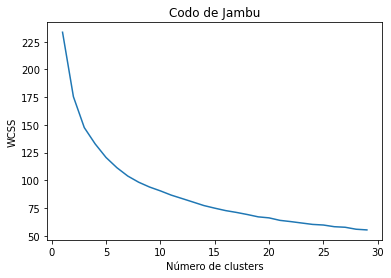

In [7]:
plt.plot(range(1,30),wcss)
plt.title('Codo de Jambu')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

## Aplicando el método k-means a la base de datos

In [8]:
clustering = KMeans(n_clusters= 20, max_iter=300)
clustering.fit(df_norm)

KMeans(n_clusters=20)

## Agregando la clasificación al archivo original

In [9]:
df['KMeans_Clusters'] = clustering.labels_

In [10]:
df.columns

Index(['HABIT', 'VEHICULOS', 'ESTUDIAN', 'INGRESOS', 'HBTOTAL',
       'KMeans_Clusters'],
      dtype='object')

In [15]:
Klusters = df.groupby(['KMeans_Clusters']).aggregate({'HBTOTAL':[np.mean,np.var,np.std]}).reset_index()

In [16]:
#Klusters = df.groupby(['KMeans_Clusters']).aggregate({'HBTOTAL':[math.ceil(np.mean),np.var,np.std]}).reset_index()

In [18]:
newdf = df.merge(right= Klusters, on="KMeans_Clusters")

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [19]:
newdf

,HABIT,VEHICULOS,ESTUDIAN,INGRESOS,HBTOTAL,KMeans_Clusters,"(HBTOTAL, mean)","(HBTOTAL, var)","(HBTOTAL, std)"
0,3,0,1,1,2,17,1.542857,0.638438,0.799023
1,4,0,1,2,2,17,1.542857,0.638438,0.799023
2,3,0,1,2,3,17,1.542857,0.638438,0.799023
3,2,0,1,1,2,17,1.542857,0.638438,0.799023
4,4,0,1,0,1,17,1.542857,0.638438,0.799023
...,...,...,...,...,...,...,...,...,...
2033,5,2,1,10,3,5,3.524390,1.610509,1.269058
2034,3,2,0,14,4,5,3.524390,1.610509,1.269058
2035,5,2,1,17,5,5,3.524390,1.610509,1.269058
2036,4,2,0,13,4,5,3.524390,1.610509,1.269058


In [40]:
lista=list(newdf.columns)

In [41]:
lista

['HABIT',
 'VEHICULOS',
 'ESTUDIAN',
 'INGRESOS',
 'HBTOTAL',
 'KMeans_Clusters',
 ('HBTOTAL', 'mean'),
 ('HBTOTAL', 'var'),
 ('HBTOTAL', 'std')]

In [43]:
newdf["Viajes"] = round(newdf[('HBTOTAL', 'mean')])

In [42]:
newdf["Viajes"] = round(newdf[lista[6]])

In [44]:
newdf

,HABIT,VEHICULOS,ESTUDIAN,INGRESOS,HBTOTAL,KMeans_Clusters,"(HBTOTAL, mean)","(HBTOTAL, var)","(HBTOTAL, std)",Viajes
0,3,0,1,1,2,17,1.542857,0.638438,0.799023,2.0
1,4,0,1,2,2,17,1.542857,0.638438,0.799023,2.0
2,3,0,1,2,3,17,1.542857,0.638438,0.799023,2.0
3,2,0,1,1,2,17,1.542857,0.638438,0.799023,2.0
4,4,0,1,0,1,17,1.542857,0.638438,0.799023,2.0
...,...,...,...,...,...,...,...,...,...,...
2033,5,2,1,10,3,5,3.524390,1.610509,1.269058,4.0
2034,3,2,0,14,4,5,3.524390,1.610509,1.269058,4.0
2035,5,2,1,17,5,5,3.524390,1.610509,1.269058,4.0
2036,4,2,0,13,4,5,3.524390,1.610509,1.269058,4.0


In [102]:
df.to_excel(r"C:\Users\Usuario\Desktop\clasificacion\base_datos2.xlsx")